In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_excel('/content/sample_data/BCDexcel.xlsx')

In [ ]:
data.drop(['Patient ID','Sample ID','Integrative Cluster'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

Study ID                          0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

In [ ]:
data['HER2 Status'].value_counts()

HER2 Status
Negative    958
Positive    134
Name: count, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
x=data.drop('HER2 Status',axis=1)
y=data['HER2 Status']

In [ ]:
y.value_counts()

HER2 Status
Negative    958
Positive    134
Name: count, dtype: int64

In [ ]:
x=x.apply(LabelEncoder().fit_transform)
y=LabelEncoder().fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
# Sequential Forward Floating Selection(sffs)
sffs = SFS(DecisionTreeClassifier(),
          k_features=(3,11),
          forward=True,
          floating=True,
          cv=0)
sffs.fit(x, y)
sffs.k_feature_names_

('Study ID', 'Age at Diagnosis', 'Overall Survival (Months)')

In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Initialize SVD and fit on the training data
svd = TruncatedSVD(n_components=x_train.shape[1] - 1)  # Use one less component than the feature count
X_train_svd = svd.fit_transform(x_train)

# Calculate explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 75% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

# Transform both the training and test data to the selected number of components
x_train = svd.transform(x_train)[:, :n_components]
x_test = svd.transform(x_test)[:, :n_components]

# Print the number of components selected
print(f"Number of components selected: {n_components}")

Number of components selected: 11


In [ ]:
model = Sequential()
model.add(Dense(units = 30,activation='relu'))
model.add(Dense(units = 30,activation='relu'))
model.add(Dense(units = 1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x = x_train,
          y = y_train,
          epochs = 60,
         #validation_data=(x_test, y_test),
         # batch_size = 1,
         verbose=1)

Epoch 1/60
26/26 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.8120
Epoch 2/60
26/26 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8864
Epoch 3/60
26/26 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8913
Epoch 4/60
26/26 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9060
Epoch 5/60
26/26 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9206
Epoch 6/60
26/26 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9353
Epoch 7/60
26/26 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9438
Epoch 8/60
26/26 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9402
Epoch 9/60
26/26 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9451
Epoch 10/60
26/26 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9499
Epoch 11/60
26/26 [

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
#loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
#print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

9/9 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9267
Test: accuracy = 0.926740  ;  loss = 0.216361


Calculating **predictions**

In [ ]:
# calculate predictions
predictions = model.predict(x_train)
print(predictions.shape)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

26/26 [==============================] - 0s 1ms/step
(819, 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

In [ ]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(predictions, y_train)

LogisticRegression()

In [ ]:
X_test_feature = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
prediction_lr=l1.predict(X_test_feature)
print(accuracy_score(y_test, prediction_lr))
print(classification_report(y_test,prediction_lr))

0.9230769230769231
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       231
           1       0.80      0.67      0.73        42

    accuracy                           0.92       273
   macro avg       0.87      0.82      0.84       273
weighted avg       0.92      0.92      0.92       273



In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, prediction_lr)
print(auc_score1)

0.8181818181818181


In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_lr, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<ipython-input-25-89f9ed397d0c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


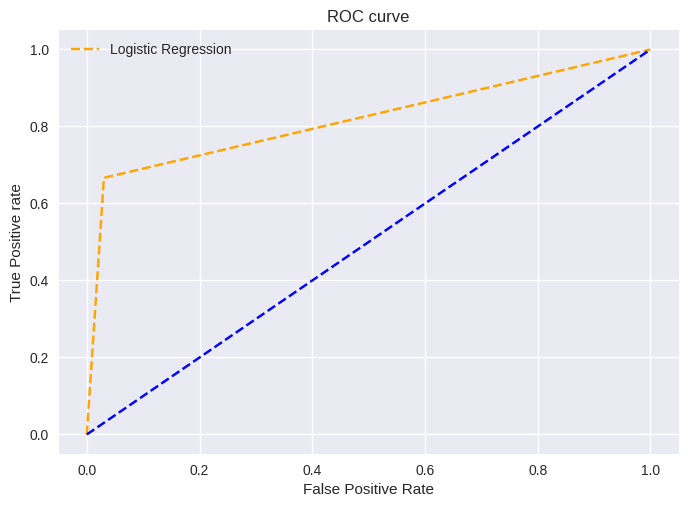

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_LR',dpi=300)
plt.show();